In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from math import log10, sqrt
import glob
from scipy import signal
from scipy import ndimage


In [ ]:
from google.colab import files
uploaded = files.upload()

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
!unzip "/content/gdrive/My Drive/P1.zip"

Archive:  /content/gdrive/My Drive/P1.zip
  inflating: P1/cristiano_ronaldo.png  
  inflating: P1/erling_haaland.png   
  inflating: P1/harry_kane.png       
  inflating: P1/jose_mourinho.png    
  inflating: P1/jurgen_klopp.png     
  inflating: P1/kevin_de_bruyne.png  
  inflating: P1/lionel_messi.png     
  inflating: P1/ngolo_kante.png      
  inflating: P1/pep_guardiola.png    
  inflating: P1/zlatan_ibrahimovic.png  


In [17]:
data = []
path = "/content/P1/*.*"
for file in glob.glob(path):
   print(file)
   a= cv2.imread(file)
   data.append(a)

/content/P1/harry_kane.png
/content/P1/ngolo_kante.png
/content/P1/pep_guardiola.png
/content/P1/erling_haaland.png
/content/P1/cristiano_ronaldo.png
/content/P1/jurgen_klopp.png
/content/P1/zlatan_ibrahimovic.png
/content/P1/kevin_de_bruyne.png
/content/P1/lionel_messi.png
/content/P1/jose_mourinho.png


In [18]:
df=[]
for i in data:
  df.append(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
  

In [6]:
image_mirrored=[]
def img_mir (image):
  mir = []
  for w in range(len(image)):
    temp = []
    for h in reversed(image[w]):
      temp.append(h)
    mir.append(temp)
    
  return mir

In [19]:
img=[]
for i in df:
  img.append(Image.fromarray(np.array(img_mir(i)), 'RGB'))


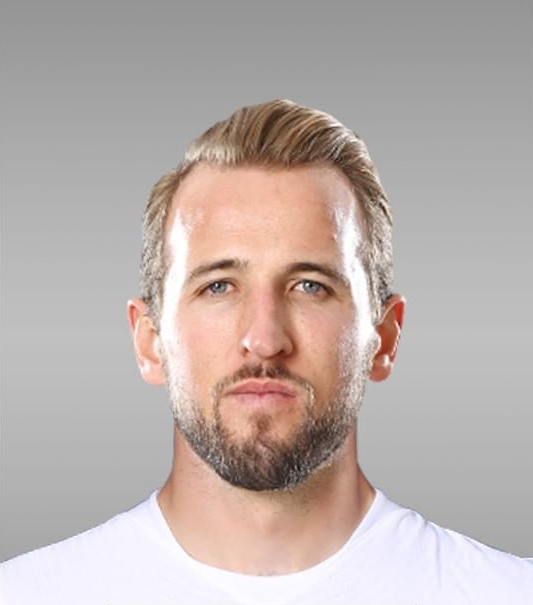

In [20]:
img[0]

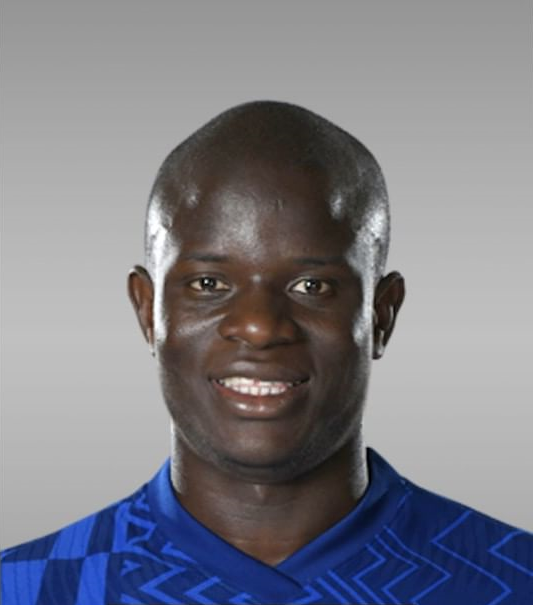

In [ ]:
img[1]

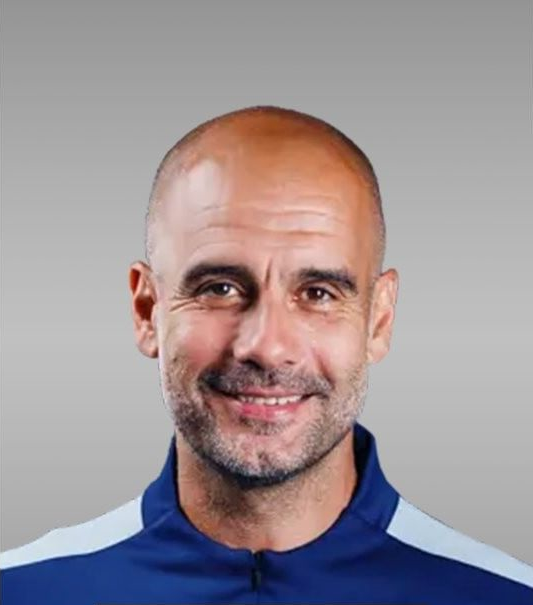

In [26]:
img[2]

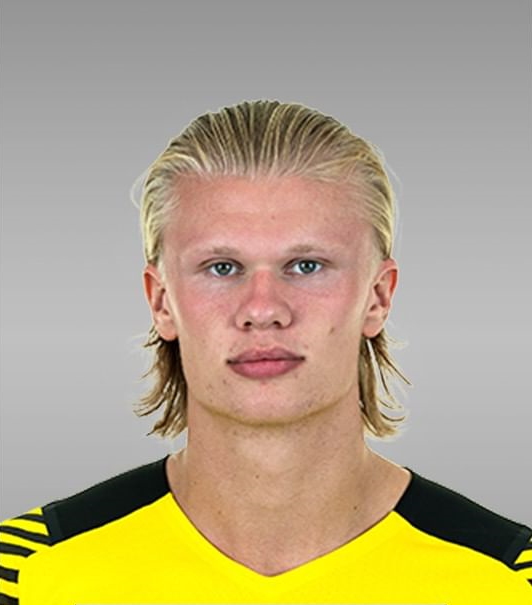

In [ ]:
img[3]

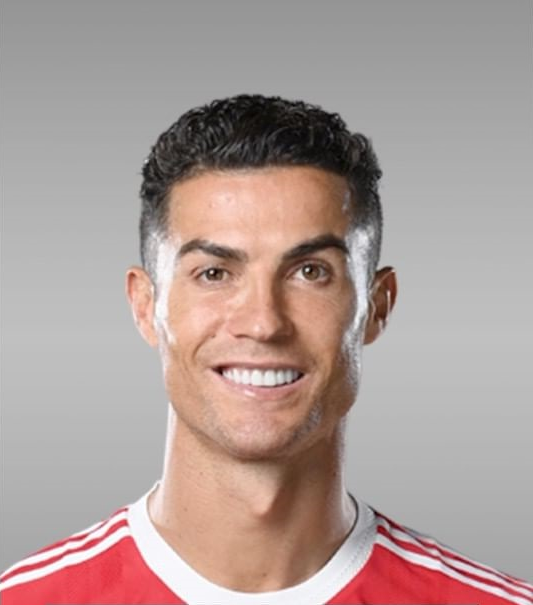

In [ ]:
img[4]

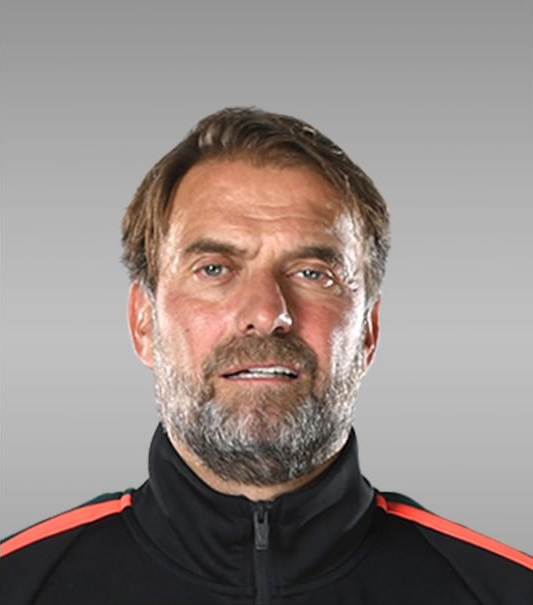

In [21]:
img[5]

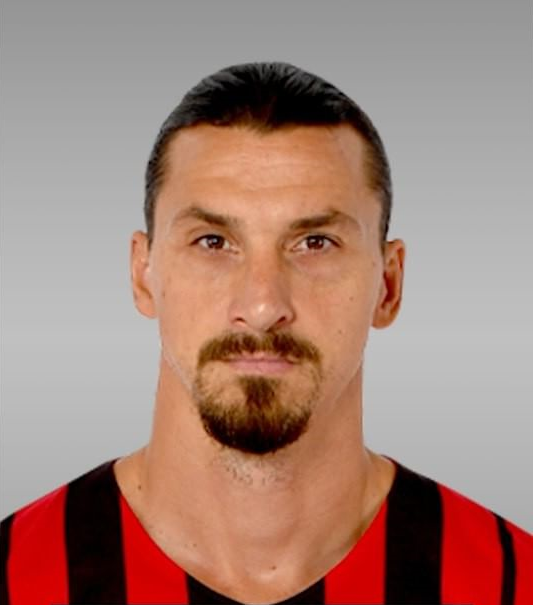

In [22]:
img[6]

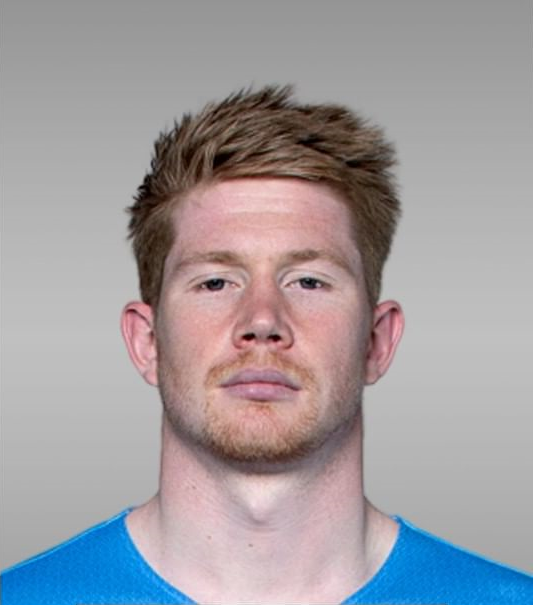

In [23]:
img[7]

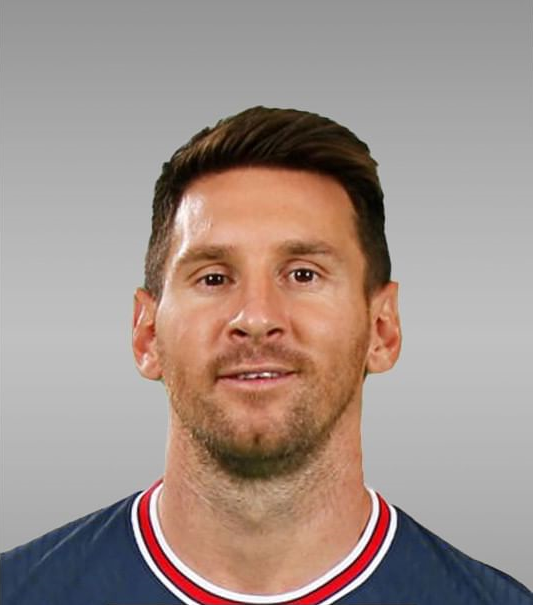

In [24]:
img[8]

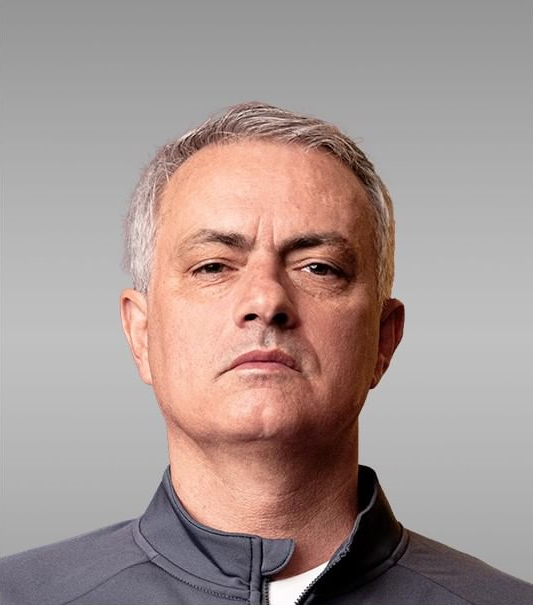

In [25]:
img[9]

In [28]:
def split_mir (image):
  p_psnr=[]
  p_ssim=[]
  half_left = [] 
  half_right =[]
  l_l =[0 for i in range(605)]
  r_r=[]
  countt=0
  for w in range(605):
    count = 0
    left_temp = []
    right_temp = []
    for h in image[w]: 
      if count >= len(image[w])/2:
        right_temp.append(h)
      elif count < len(image[w])/2:
        left_temp.append(h)
      count = count +1
    half_left.append(left_temp)
    half_right.append(right_temp)
    
    #creating mirror
  half_left_mir= img_mir(half_left)
  r_r_pic=img_mir(half_right)
  r_l_pic=img_mir(half_right)
    # craeting L L
  l_l_pic=half_left
    # craeting L L
  for h in range(len(image)):
    l_l_pic[h].extend(half_left_mir[h])

  for h in range(len(image)):
    r_r_pic[h].extend(half_right[h])

  for h in range(len(image)):
    r_l_pic[h].extend(half_left_mir[h])
  
  l_l_compress=l_l_pic 
  l_l_compress =np.delete(l_l_compress, 533, 1)
  p_psnr.append(PSNR(image, l_l_compress))
  p_ssim.append(calculate_ssim(np.array(image), np.array(l_l_compress)))

  origin_image=image 
  origin_image =np.delete(origin_image, 532, 1)
  p_psnr.append(PSNR(origin_image, r_r_pic))
  p_ssim.append(calculate_ssim(np.array(origin_image), np.array(r_r_pic)))

  p_psnr.append(PSNR(image, r_l_pic))
  p_ssim.append(calculate_ssim(np.array(image), np.array(r_l_pic)))

  return l_l_pic, r_r_pic, r_l_pic, p_psnr, p_ssim




In [27]:
def PSNR(original, compress):
	mse = np.mean((original - compress) ** 2)
	if(mse == 0):
		return 100
	max_pixel = len(original)
	psnr= 20 * log10(max_pixel / sqrt(mse))
	return psnr

In [32]:

def ssim(img1, img2):
    x1 = (0.01 * 255)**2
    x2 = (0.03 * 255)**2
    img1 = img1.astype(np.float64)
    img2 = img2.astype(np.float64)
    kernel = cv2.getGaussianKernel(11, 1.5)
    field = np.outer(kernel, kernel.transpose())
    m1 = cv2.filter2D(img1, -1, field)[5:-5, 5:-5]  # valid
    m2 = cv2.filter2D(img2, -1, field)[5:-5, 5:-5]
    sq1 = m1**2
    sq2 = m2**2
    mu = m1 * m2
    sigma1 = cv2.filter2D(img1**2, -1, field)[5:-5, 5:-5] - sq1
    sigma2 = cv2.filter2D(img2**2, -1, field)[5:-5, 5:-5] - sq2
    sigma = cv2.filter2D(img1 * img2, -1, field)[5:-5, 5:-5] - mu
    ssim_map = ((2 * mu + x1) * (2 * sigma + x2)) / ((sq1 + sq2 + x1) *
                                                            (sigma1 + sigma2 + x2))
    return ssim_map.mean()


def calculate_ssim(img1, img2):
    ssims=[]
    if img1.ndim == 2:
        return ssim(img1, img2)
    elif img1.ndim == 3:
        if img1.shape[2] == 3:
            ssims = []
            for i in range(3):
                ssims.append(ssim(img1, img2))
            return np.array(ssims).mean()
        elif img1.shape[2] == 1:
            return ssim(np.squeeze(img1), np.squeeze(img2))

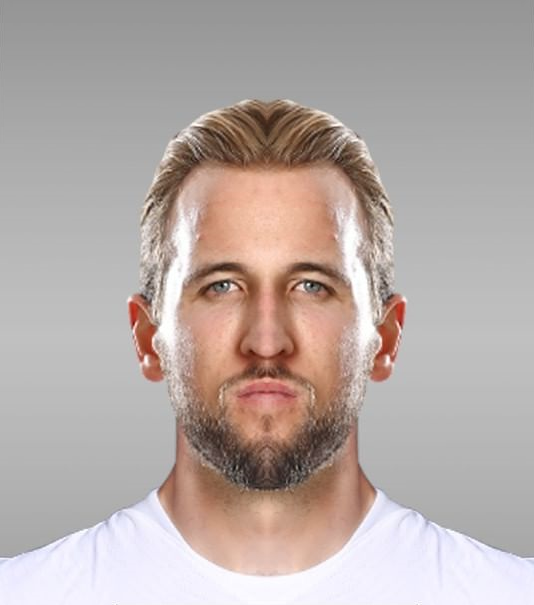

In [33]:

img1, img2, img3 ,  p_psnr, p_ssim= split_mir(df[0])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic


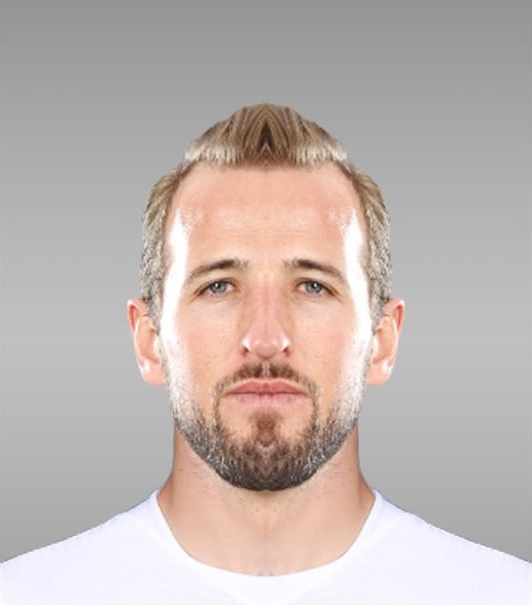

In [ ]:
r_r_pic

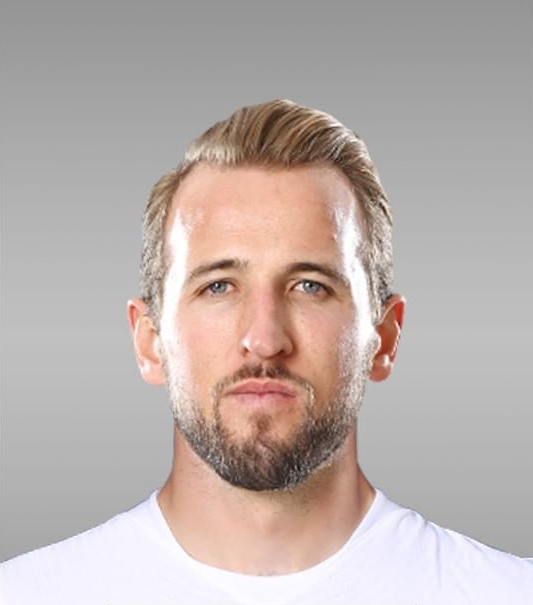

In [ ]:
r_l_pic

In [34]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 43.04927057111961 dB
PSNR value for r_r picture is 41.88622350145057 dB
PSNR value for r_l picture is 40.03873944414692 dB
-------------------------------------------
ssim value for l_l picture is 0.9049632795551982 dB
ssim value for r_r picture is 0.8809165807417432 dB
ssim value for r_l picture is 0.8070101854576847 dB


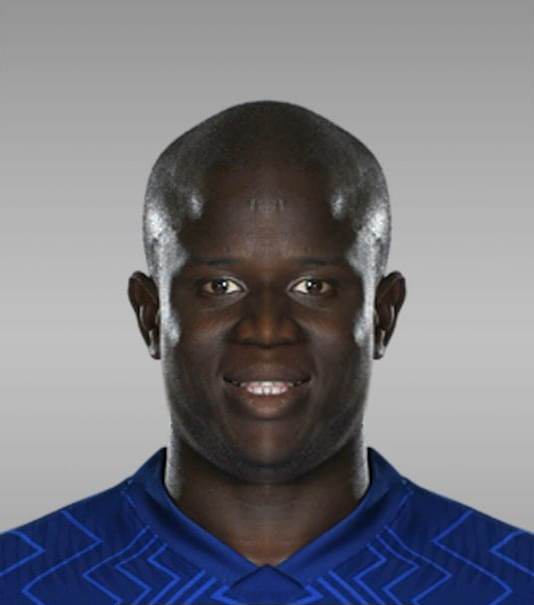

In [35]:
img1, img2, img3 , p_psnr, p_ssim = split_mir(df[1])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic

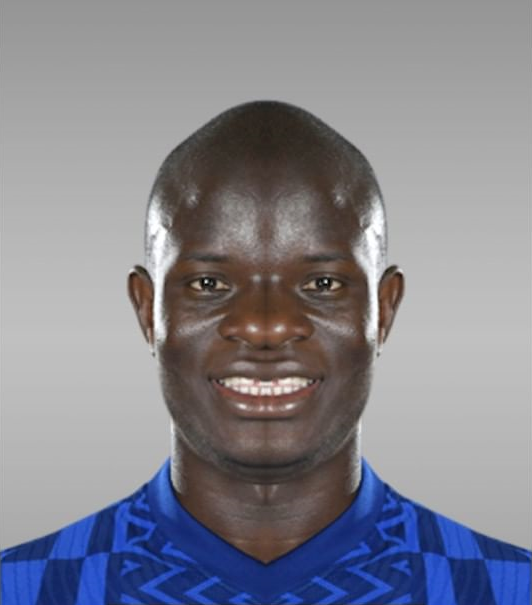

In [ ]:
r_r_pic

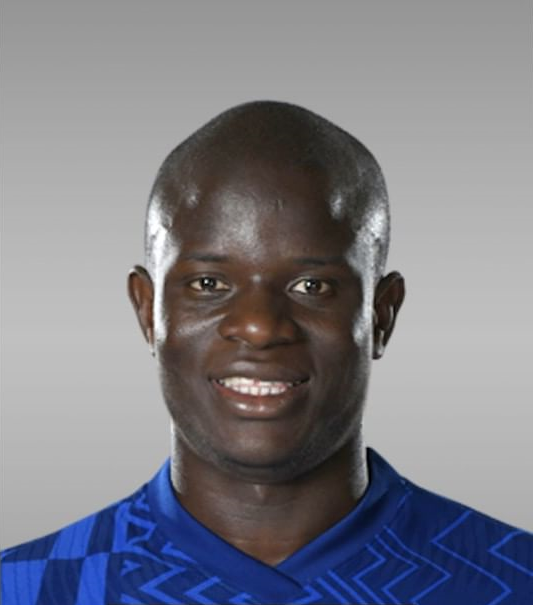

In [ ]:
r_l_pic

In [37]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 42.032964376480564 dB
PSNR value for r_r picture is 41.162952950321795 dB
PSNR value for r_l picture is 39.04398906322247 dB
-------------------------------------------
ssim value for l_l picture is 0.8759983759186648 dB
ssim value for r_r picture is 0.859920409931406 dB
ssim value for r_l picture is 0.751655729001555 dB


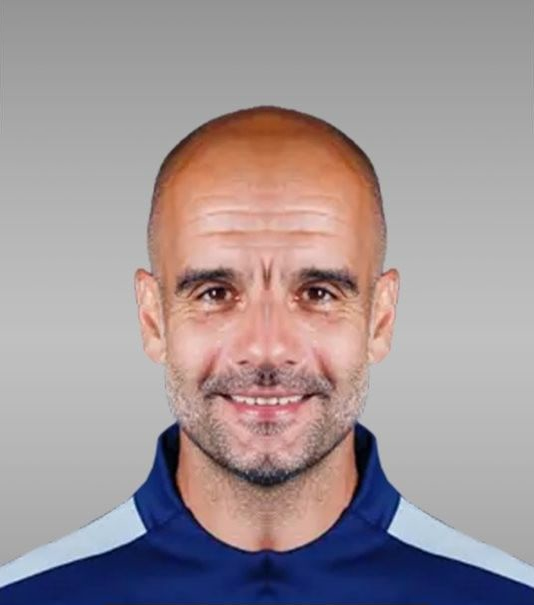

In [39]:
img1, img2, img3 , p_psnr, p_ssim = split_mir(df[2])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic

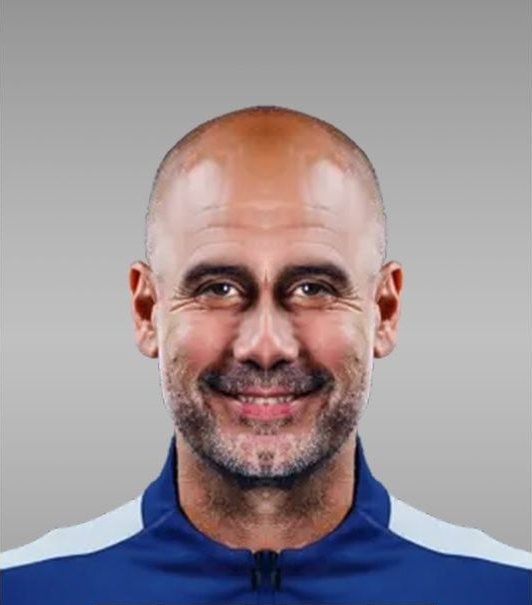

In [ ]:
r_r_pic

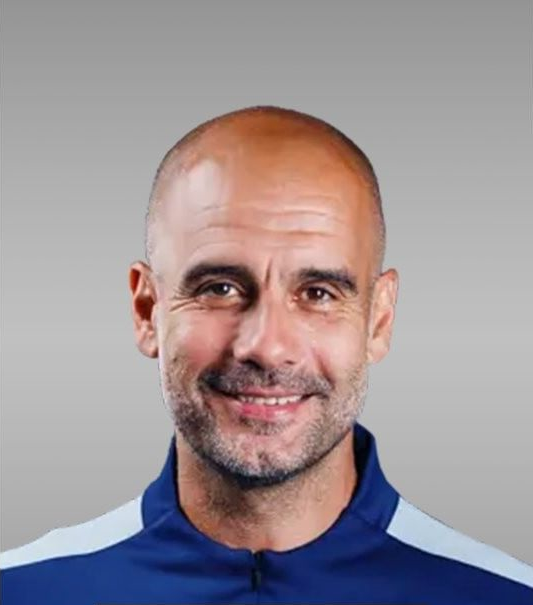

In [ ]:
r_l_pic

In [40]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 42.30827899081422 dB
PSNR value for r_r picture is 41.26855687598935 dB
PSNR value for r_l picture is 39.28906572867642 dB
-------------------------------------------
ssim value for l_l picture is 0.8817386150064825 dB
ssim value for r_r picture is 0.8618735758634463 dB
ssim value for r_l picture is 0.7598146574645055 dB


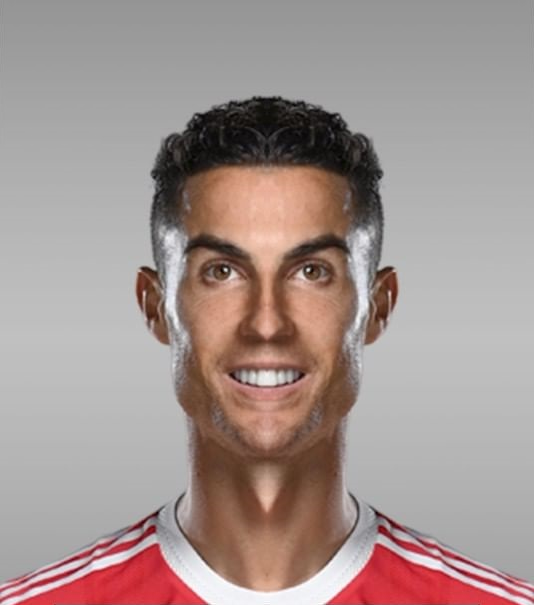

In [42]:
img1, img2, img3 , p_psnr, p_ssim = split_mir(df[4])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic

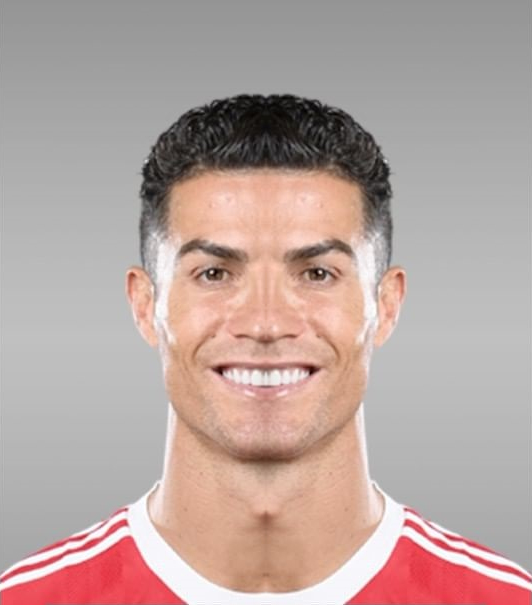

In [ ]:
r_r_pic

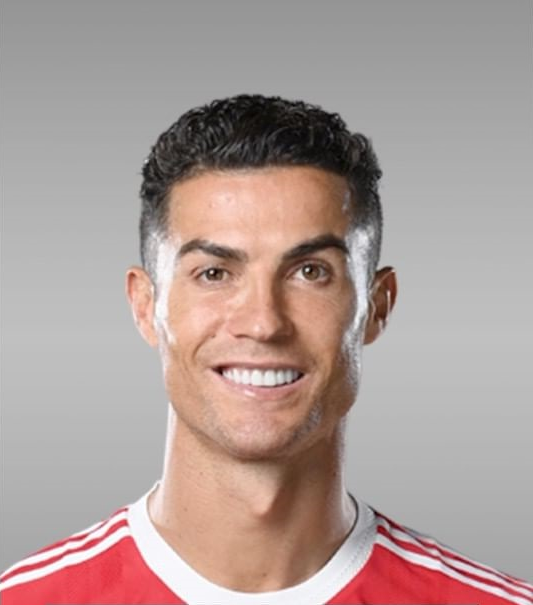

In [ ]:
r_l_pic

In [43]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 42.06112727267036 dB
PSNR value for r_r picture is 41.07431771104635 dB
PSNR value for r_l picture is 39.04186988228274 dB
-------------------------------------------
ssim value for l_l picture is 0.857410841507587 dB
ssim value for r_r picture is 0.8364775697828698 dB
ssim value for r_l picture is 0.7111036400857037 dB


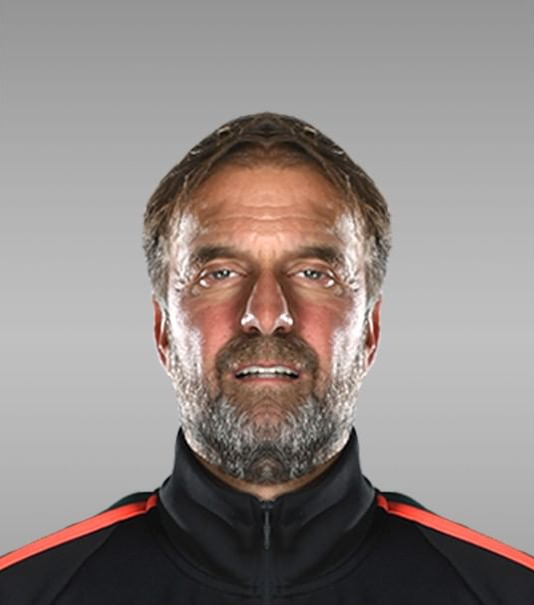

In [44]:
img1, img2, img3 , p_psnr, p_ssim = split_mir(df[5])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic

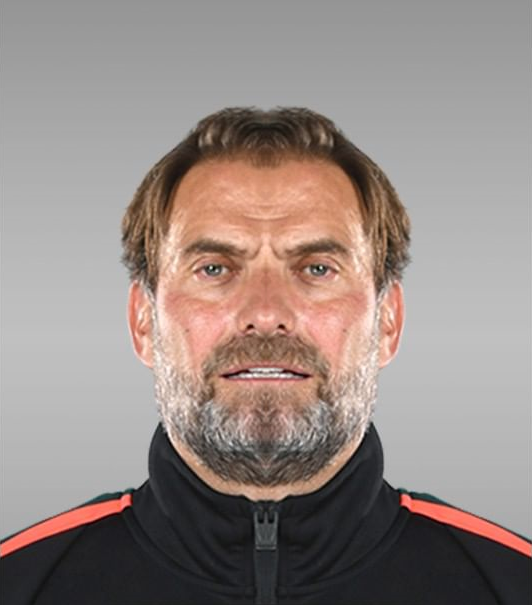

In [ ]:
r_r_pic

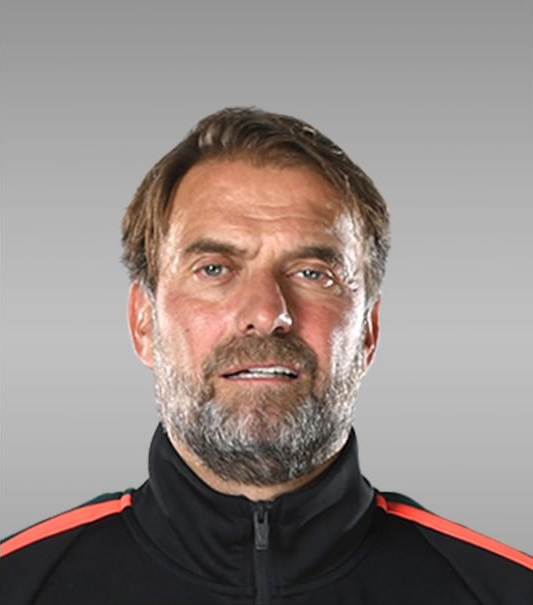

In [ ]:
r_l_pic

In [45]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 42.57768362896482 dB
PSNR value for r_r picture is 41.142700213697516 dB
PSNR value for r_l picture is 39.540220725528215 dB
-------------------------------------------
ssim value for l_l picture is 0.8519425581274173 dB
ssim value for r_r picture is 0.8232461185220766 dB
ssim value for r_l picture is 0.7015118703067372 dB


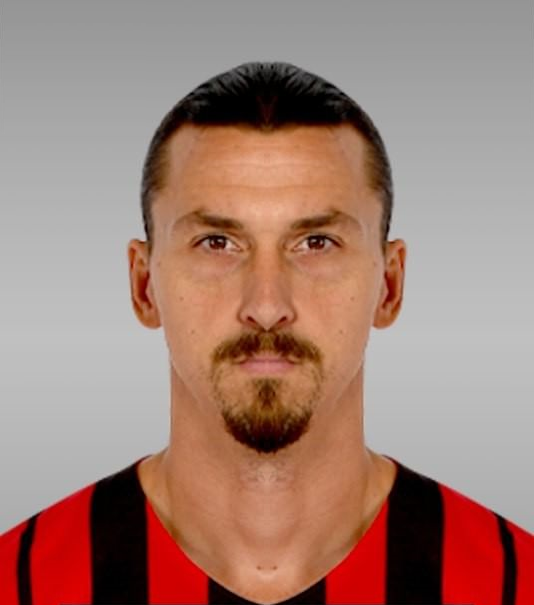

In [46]:
img1, img2, img3 , p_psnr, p_ssim = split_mir(df[6])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic

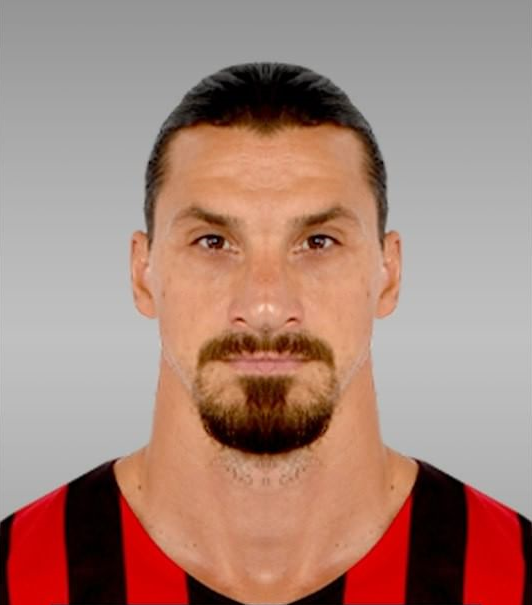

In [ ]:
r_r_pic

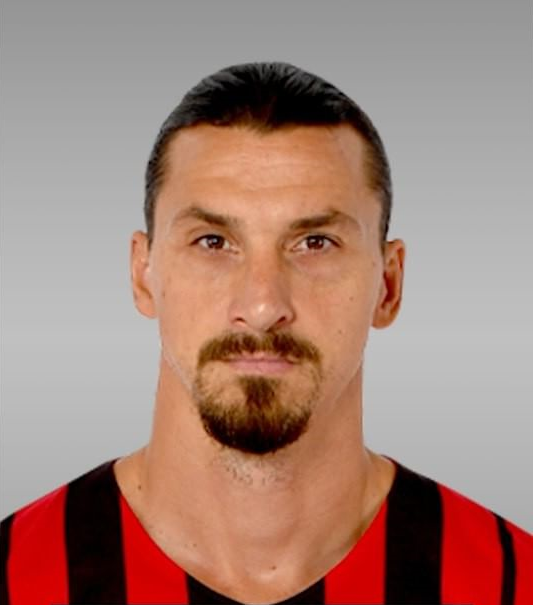

In [ ]:
r_l_pic

In [47]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 42.26884663225348 dB
PSNR value for r_r picture is 41.437592093907575 dB
PSNR value for r_l picture is 39.24210853975278 dB
-------------------------------------------
ssim value for l_l picture is 0.8840372655559907 dB
ssim value for r_r picture is 0.866892345897463 dB
ssim value for r_l picture is 0.7664969334643742 dB


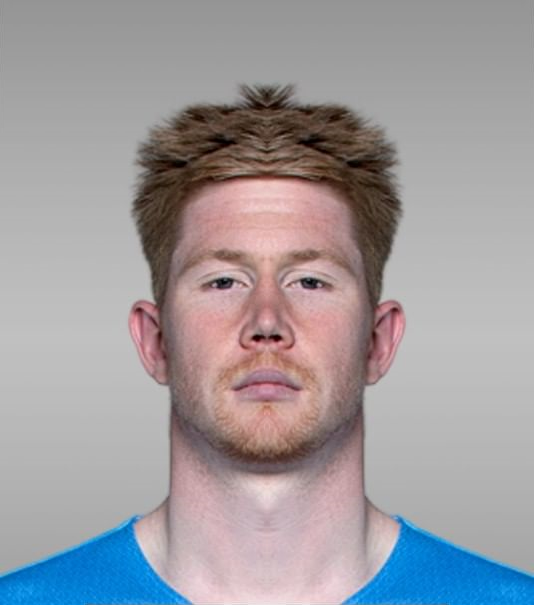

In [48]:
img1, img2, img3 , p_psnr, p_ssim = split_mir(df[7])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic

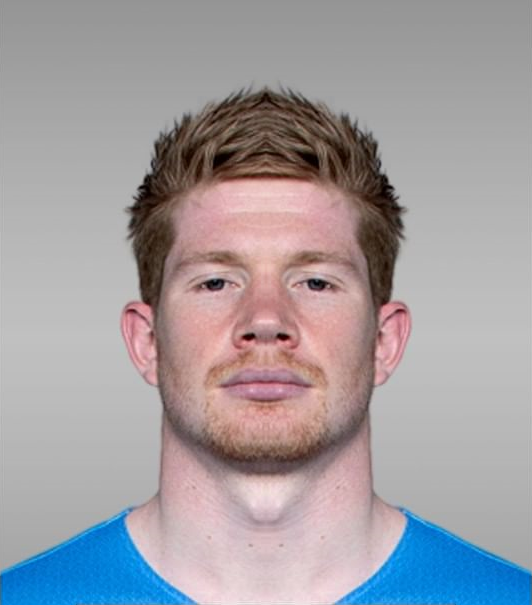

In [ ]:
r_r_pic

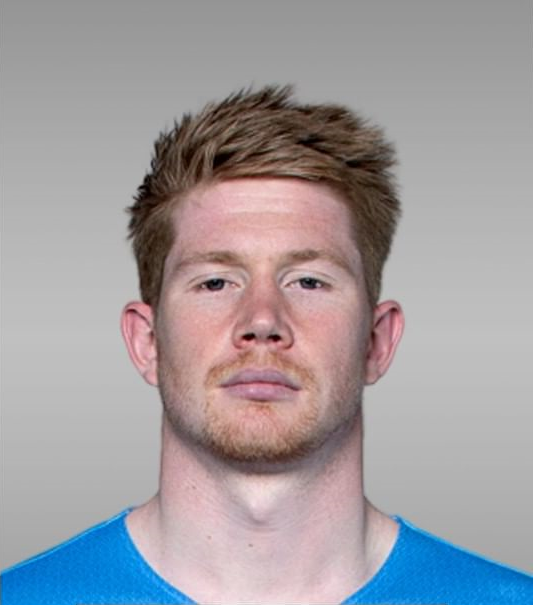

In [ ]:
r_l_pic

In [49]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 42.534596921670726 dB
PSNR value for r_r picture is 41.33948352964172 dB
PSNR value for r_l picture is 39.48813114101218 dB
-------------------------------------------
ssim value for l_l picture is 0.8808279830165576 dB
ssim value for r_r picture is 0.8544674275602766 dB
ssim value for r_l picture is 0.7578252381815581 dB


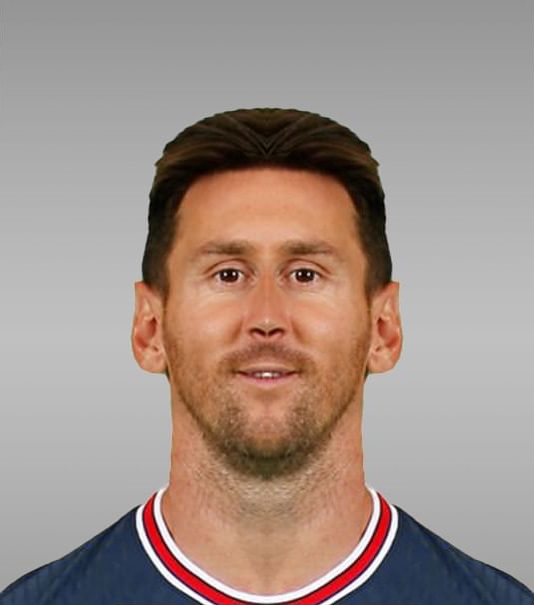

In [50]:
img1, img2, img3 , p_psnr, p_ssim = split_mir(df[8])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic

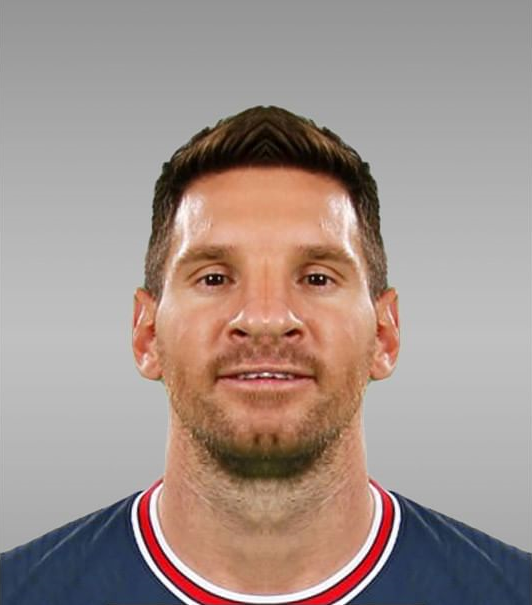

In [ ]:
r_r_pic

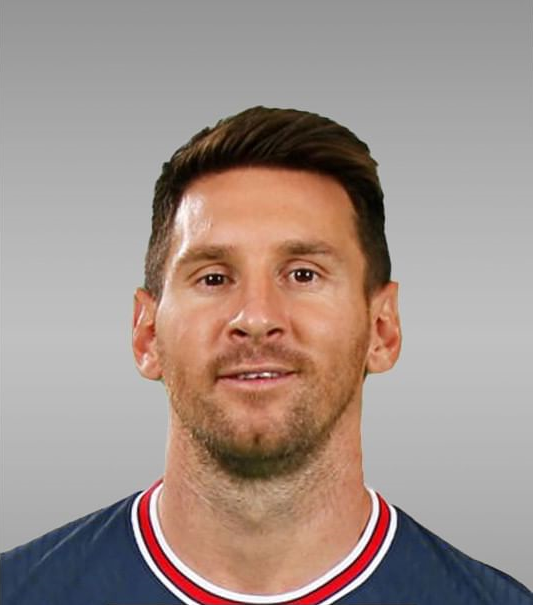

In [ ]:
r_l_pic

In [51]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 42.87693474177546 dB
PSNR value for r_r picture is 41.56701562826068 dB
PSNR value for r_l picture is 39.84148360496373 dB
-------------------------------------------
ssim value for l_l picture is 0.8726081662620769 dB
ssim value for r_r picture is 0.8467821091553335 dB
ssim value for r_l picture is 0.7434450069381539 dB


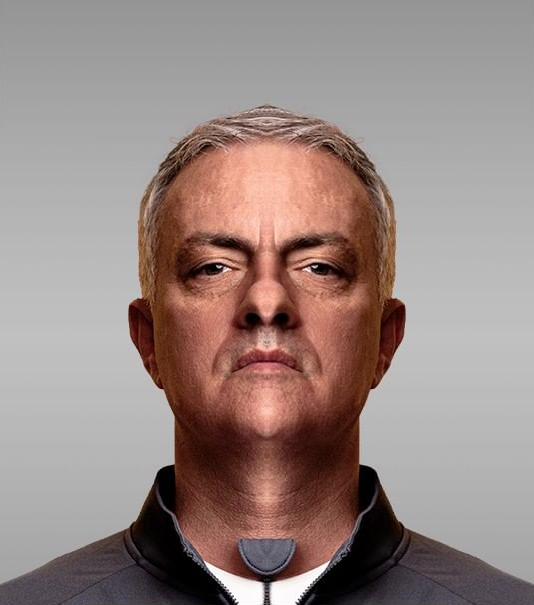

In [52]:
img1, img2, img3 , p_psnr, p_ssim = split_mir(df[9])
l_l_pic=Image.fromarray(np.array(img1), 'RGB')
r_r_pic=Image.fromarray(np.array(img2), 'RGB')
r_l_pic=Image.fromarray(np.array(img3), 'RGB')
l_l_pic

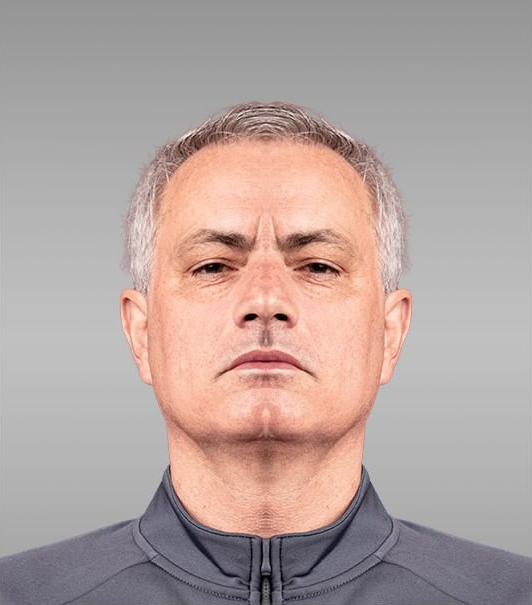

In [ ]:
r_r_pic

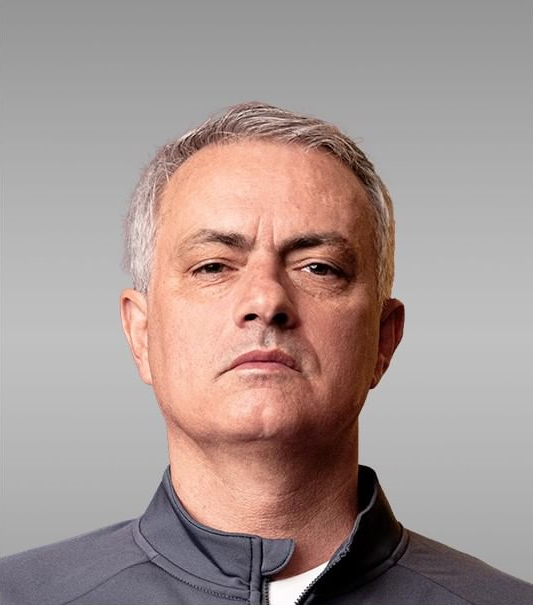

In [ ]:
r_l_pic

In [53]:
print(f"PSNR value for l_l picture is {p_psnr[0]} dB")
print(f"PSNR value for r_r picture is {p_psnr[1]} dB")
print(f"PSNR value for r_l picture is {p_psnr[2]} dB")
print('-------------------------------------------')
print(f"ssim value for l_l picture is {p_ssim[0]} dB")
print(f"ssim value for r_r picture is {p_ssim[1]} dB")
print(f"ssim value for r_l picture is {p_ssim[2]} dB")

PSNR value for l_l picture is 42.06607365871104 dB
PSNR value for r_r picture is 40.726239880912644 dB
PSNR value for r_l picture is 39.06134562274164 dB
-------------------------------------------
ssim value for l_l picture is 0.8347222071164513 dB
ssim value for r_r picture is 0.7872677587250018 dB
ssim value for r_l picture is 0.6695767470252901 dB
